In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import datasist as ds
import plotly.express as px

In [2]:
df = pd.read_excel('default of credit card clients.xls',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [4]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data = df.copy()

In [6]:
data.rename({"PAY_0":"PAY_1","default payment next month":"default_payment_next_month"},axis= 1 ,inplace=True)

In [7]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
data.isna().sum()

ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_1                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default_payment_next_month      0
dtype: int64

In [9]:
data[data['MARRIAGE'].isna()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
15,16,50000,female,high school,NaN,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
51,52,100000,female,high school,NaN,43,0,0,0,0,...,39619,35762,33258,2000,1606,1500,2000,1500,1000,0
80,81,470000,female,high school,NaN,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
239,240,140000,female,university,NaN,41,0,0,0,0,...,19068,16409,16383,3000,2000,2198,1000,3000,2399,1
373,374,30000,male,high school,NaN,54,0,0,0,0,...,23221,24339,25943,2500,2000,1500,4000,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29282,29283,80000,female,graduate school,NaN,25,0,-1,-1,-1,...,478,219,0,1136,727,478,219,0,0,0
29509,29510,200000,male,university,NaN,41,0,0,0,2,...,116278,128087,125931,3864,14269,0,13808,0,4600,0
29612,29613,20000,male,university,NaN,47,-1,-1,2,2,...,0,780,0,780,0,0,780,0,0,1
29745,29746,20000,male,university,NaN,40,0,0,0,-1,...,20000,0,780,1500,1000,20000,0,390,0,0


In [10]:
data['MARRIAGE'].value_counts()

MARRIAGE
single     15964
married    13659
0             54
Name: count, dtype: int64

In [11]:
data[data['EDUCATION'].isna()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
47,48,150000,female,NaN,single,46,0,0,-1,0,...,1170,0,0,1013,1170,0,0,0,0,1
69,70,20000,male,NaN,single,22,2,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
385,386,410000,female,NaN,married,42,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
502,503,230000,female,NaN,single,46,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
504,505,30000,male,NaN,married,53,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,29812,50000,male,NaN,single,46,0,0,0,-1,...,19183,19563,19157,1423,1000,19183,687,696,776,0
29836,29837,180000,male,NaN,married,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29839,29840,150000,male,NaN,married,36,0,0,0,0,...,136378,139219,142172,5500,3800,3900,4000,4100,4100,0
29920,29921,50000,male,NaN,married,45,2,0,0,0,...,50947,51020,0,3000,3428,2002,1023,0,0,1


In [12]:
data['EDUCATION'].value_counts()

EDUCATION
university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: count, dtype: int64

In [13]:
data['EDUCATION'] = data['EDUCATION'].str.replace('0','others')

In [14]:
data['EDUCATION'].value_counts()

EDUCATION
university         14030
graduate school    10585
high school         4916
others               124
Name: count, dtype: int64

In [15]:
mod = data['EDUCATION'].mode()[0]
mod

'university'

In [16]:
data['EDUCATION'].fillna(value=mod , inplace=True)

C:\Users\AhmedRostom\AppData\Local\Temp\ipykernel_3780\2252729685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['EDUCATION'].fillna(value=mod , inplace=True)


In [17]:
data['EDUCATION'].isna().sum()

0

In [18]:
data['MARRIAGE'] = data['MARRIAGE'].str.replace('0','others')
data['MARRIAGE']

0        married
1         single
2         single
3        married
4        married
          ...   
29995    married
29996     single
29997     single
29998    married
29999    married
Name: MARRIAGE, Length: 30000, dtype: object

In [19]:
data['MARRIAGE'].fillna('others',inplace= True)

In [20]:
data['MARRIAGE'].value_counts()

MARRIAGE
single     15964
married    13659
others       377
Name: count, dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
data.drop('ID',axis=1 , inplace= True)

In [23]:
data['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [24]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [25]:
col = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in col : 
    data[i] = data[i].replace([0,-2],-1)

In [26]:
data['PAY_5'].value_counts()

PAY_5
-1    27032
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

<Axes: ylabel='AGE'>

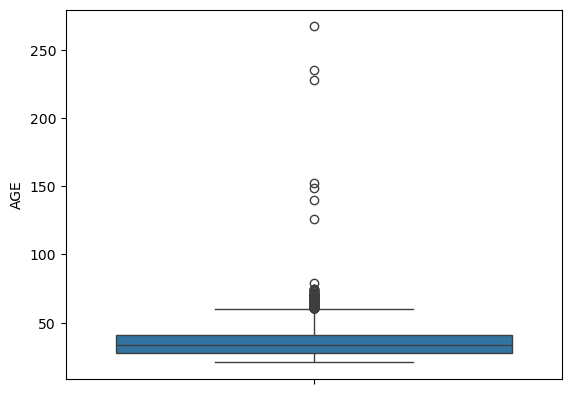

In [27]:
sns.boxplot(data['AGE'])

In [28]:
out_age =  ds.structdata.detect_outliers(data , 0 , ['AGE'] )
out_age

[102,
 246,
 366,
 387,
 1029,
 1058,
 1070,
 1073,
 1171,
 1194,
 1505,
 1583,
 1625,
 1644,
 1685,
 1711,
 1822,
 1883,
 1991,
 1992,
 2104,
 2134,
 2160,
 2221,
 2366,
 2426,
 2601,
 3257,
 3264,
 3407,
 3595,
 3632,
 3773,
 3988,
 4011,
 4107,
 4116,
 4243,
 4495,
 4550,
 4971,
 5000,
 5049,
 5253,
 5395,
 5415,
 5498,
 5512,
 5572,
 5709,
 5816,
 5824,
 5849,
 6023,
 6076,
 6083,
 6106,
 6158,
 6511,
 6530,
 6561,
 6906,
 6912,
 6947,
 6953,
 6963,
 7038,
 7165,
 7177,
 7179,
 7221,
 7318,
 7356,
 7471,
 7593,
 7681,
 7932,
 7954,
 8000,
 8019,
 8082,
 8159,
 8494,
 8566,
 8586,
 8810,
 8827,
 8844,
 8940,
 9014,
 9312,
 9376,
 9386,
 9395,
 9399,
 9768,
 9832,
 10057,
 10061,
 10100,
 10202,
 10235,
 10341,
 10418,
 10549,
 10610,
 10699,
 10740,
 10827,
 10899,
 10991,
 11149,
 11210,
 11368,
 11510,
 11766,
 11806,
 11816,
 11974,
 12007,
 12018,
 12653,
 12741,
 12762,
 12888,
 12923,
 12955,
 13029,
 13112,
 13156,
 13166,
 13168,
 13325,
 13371,
 13391,
 13559,
 13566,
 1357

In [29]:
data.drop(out_age,axis=0,inplace=True)

<Axes: ylabel='AGE'>

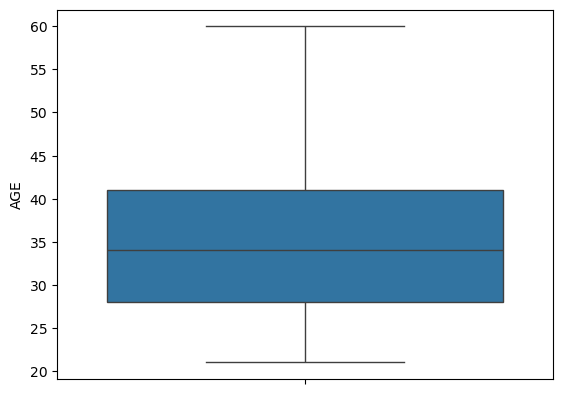

In [30]:
sns.boxplot(data['AGE'])

<Axes: xlabel='default_payment_next_month', ylabel='count'>

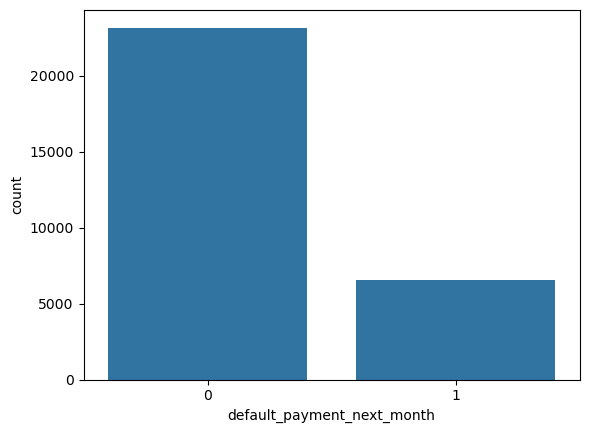

In [31]:
sns.countplot(data =data , x = 'default_payment_next_month')

<Axes: xlabel='SEX', ylabel='count'>

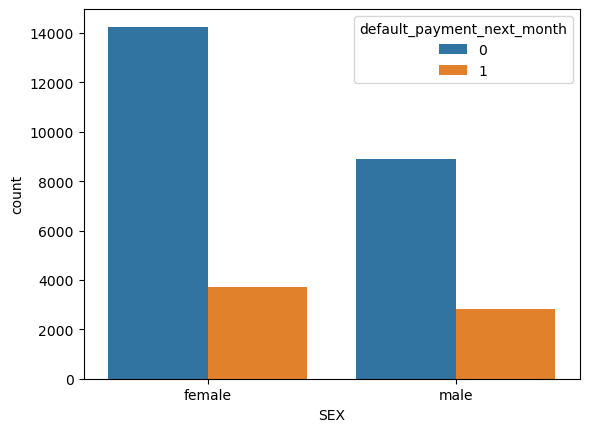

In [66]:
sns.countplot(data =data ,x= 'SEX' ,hue = 'default_payment_next_month')

In [76]:
 pie  = data.groupby('SEX')['default_payment_next_month'].size().reset_index()
 pie

,SEX,default_payment_next_month
0,female,17986
1,male,11736


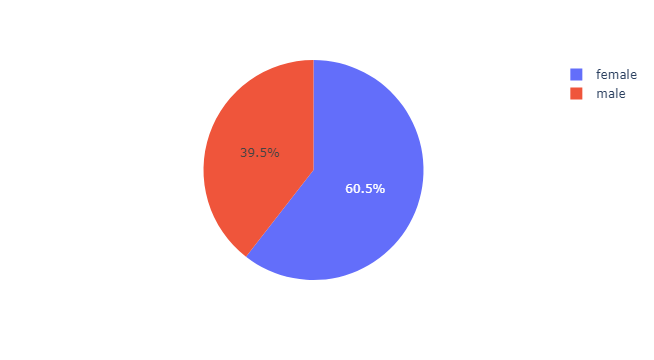

In [78]:
px.pie(data_frame=pie , names= 'SEX',values='default_payment_next_month')

<Axes: xlabel='default_payment_next_month', ylabel='BILL_AMT1'>

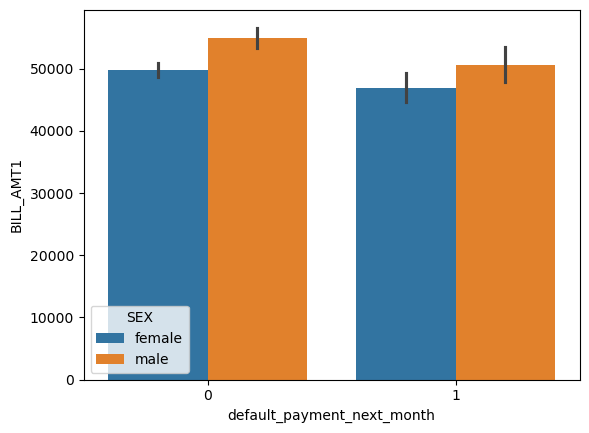

In [84]:
sns.barplot(data = data ,x= 'default_payment_next_month' ,y = 'BILL_AMT1' , hue = 'SEX')

<Axes: xlabel='default_payment_next_month', ylabel='BILL_AMT1'>

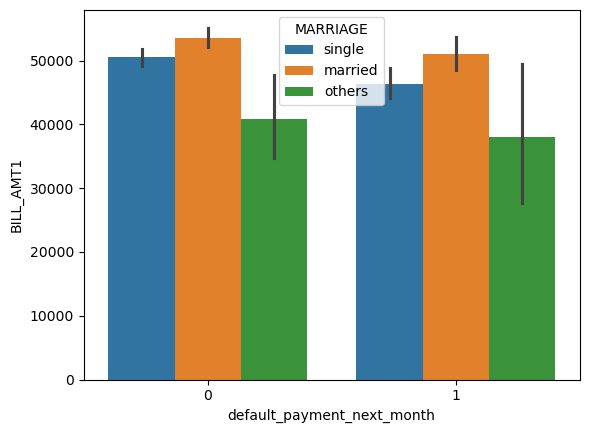

In [86]:
sns.barplot(data = data ,x= 'default_payment_next_month' ,y = 'BILL_AMT1' , hue = 'MARRIAGE')

In [90]:
data = pd.get_dummies(data)
data

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default_payment_next_month,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-1,-1,3913,3102,...,1,True,False,False,False,False,True,True,False,False
1,120000,26,-1,2,-1,-1,-1,2,2682,1725,...,1,True,False,False,False,False,True,False,False,True
2,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,...,0,True,False,False,False,False,True,False,False,True
3,50000,37,-1,-1,-1,-1,-1,-1,46990,48233,...,0,True,False,False,False,False,True,True,False,False
4,50000,57,-1,-1,-1,-1,-1,-1,8617,5670,...,0,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,-1,-1,-1,-1,-1,-1,188948,192815,...,0,False,True,False,True,False,False,True,False,False
29996,150000,43,-1,-1,-1,-1,-1,-1,1683,1828,...,0,False,True,False,True,False,False,False,False,True
29997,30000,37,4,3,2,-1,-1,-1,3565,3356,...,1,False,True,False,False,False,True,False,False,True
29998,80000,41,1,-1,-1,-1,-1,-1,-1645,78379,...,1,False,True,False,True,False,False,True,False,False


In [94]:
x = data.drop('default_payment_next_month',axis= 1)
x

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-1,-1,3913,3102,...,0,True,False,False,False,False,True,True,False,False
1,120000,26,-1,2,-1,-1,-1,2,2682,1725,...,2000,True,False,False,False,False,True,False,False,True
2,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,...,5000,True,False,False,False,False,True,False,False,True
3,50000,37,-1,-1,-1,-1,-1,-1,46990,48233,...,1000,True,False,False,False,False,True,True,False,False
4,50000,57,-1,-1,-1,-1,-1,-1,8617,5670,...,679,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,-1,-1,-1,-1,-1,-1,188948,192815,...,1000,False,True,False,True,False,False,True,False,False
29996,150000,43,-1,-1,-1,-1,-1,-1,1683,1828,...,0,False,True,False,True,False,False,False,False,True
29997,30000,37,4,3,2,-1,-1,-1,3565,3356,...,3100,False,True,False,False,False,True,False,False,True
29998,80000,41,1,-1,-1,-1,-1,-1,-1645,78379,...,1804,False,True,False,True,False,False,True,False,False


In [98]:
y = data['default_payment_next_month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 29722, dtype: int64

In [100]:
from imblearn.over_sampling import SMOTE
o = SMOTE()

In [102]:
x_res , y_res = o.fit_resample(x,y)

In [106]:
y_res .value_counts()

default_payment_next_month
1    23161
0    23161
Name: count, dtype: int64

In [110]:
x_res

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-1,-1,3913,3102,...,0,True,False,False,False,False,True,True,False,False
1,120000,26,-1,2,-1,-1,-1,2,2682,1725,...,2000,True,False,False,False,False,True,False,False,True
2,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,...,5000,True,False,False,False,False,True,False,False,True
3,50000,37,-1,-1,-1,-1,-1,-1,46990,48233,...,1000,True,False,False,False,False,True,True,False,False
4,50000,57,-1,-1,-1,-1,-1,-1,8617,5670,...,679,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46317,50000,29,1,0,0,-1,-1,-1,49580,49504,...,825,False,False,False,False,False,False,False,False,False
46318,114627,26,0,0,0,0,-1,-1,109264,110074,...,4000,False,False,False,False,False,False,False,False,True
46319,60000,28,1,1,1,-1,-1,-1,62407,62542,...,19235,False,False,False,False,False,True,False,False,False
46320,500000,39,0,-1,0,0,-1,-1,-102,515,...,3749,False,False,False,False,False,False,False,False,False
